#Importing Dependencies


In [2]:
!pip install gekko


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install -U ydata-profiling


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install ipywidgets


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import itertools
from collections import defaultdict
from itertools import permutations,combinations
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns
from gekko import GEKKO
from ydata_profiling import ProfileReport
from PIL import Image
import requests


#Data

In [6]:
import pandas as pd

#Importing dataset 
data=pd.read_csv("data/attribution_data.csv")
data=pd.DataFrame(data)
data

cookie                  time interaction  \
0       00000FkCnDfDDf0iC97iC703B  2018-07-03T13:02:11Z  impression   
1       00000FkCnDfDDf0iC97iC703B  2018-07-17T19:15:07Z  impression   
2       00000FkCnDfDDf0iC97iC703B  2018-07-24T15:51:46Z  impression   
3       00000FkCnDfDDf0iC97iC703B  2018-07-29T07:44:51Z  impression   
4       0000nACkD9nFkBBDECD3ki00E  2018-07-03T09:44:57Z  impression   
...                           ...                   ...         ...   
586732  ooooEiB0CCoEf9fiiC90Dfhfk  2018-07-12T23:50:45Z  impression   
586733  ooooEiB0CCoEf9fiiC90Dfhfk  2018-07-12T23:50:54Z  impression   
586734  ooooiBh70D3k3BfAhDFfii9h7  2018-07-03T12:57:25Z  impression   
586735  ooooiBh70D3k3BfAhDFfii9h7  2018-07-19T08:17:59Z  impression   
586736  ooooohAFofEnonEikhAi3fF9o  2018-07-14T17:17:12Z  impression   

        conversion  conversion_value         channel  
0                0               0.0       Instagram  
1                0               0.0  Online Display  
2                0               0.0  Online Display  
3                0               0.0  Online Display  
4                0               0.0     Paid Search  
...            ...               ...             ...  
586732           0               0.0  Online Display  
586733           0               0.0  Online Display  
586734           0               0.0     Paid Search  
586735           0               0.0    Online Video  
586736           0               0.0     Paid Search  

[586737 rows x 6 columns]

#Exploratory Data Analysis

In [7]:
#Creating exploratory data analysis report using pandas profiling python module

profile = ProfileReport(data, title='Attribution Data Report', explorative=True) 

In [8]:
#Displaying the report

profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
profile1 = ProfileReport(data, title='Attribution Data Report', explorative=True)
profile1.to_file("Report.html")               #An html report is being generated and saved

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#I. Single-Touch Attribution Models


*  Single-touch attribution models assign 100% of conversion  credit to one marketing channel disregarding any number of channels visited by an user.

*   This a very naive and easy approach because of their low level of complexity. 

*   These models should be used when the number of channels for a particular campaign is 5 or less.(Preferrably Last-Touch Attribution Model)








##1.Last-Touch Attribution Model



*   Last-touch attribution assigns 100% of the credit to the last marketing touchpoint.

*   The argument behind this approach is that the last touch is all that matters because it resulted in the actual conversion, but in reality it doesn’t tell the whole story. Your customers are likely engaging with your brand across multiple touchpoints on various channels before they convert.



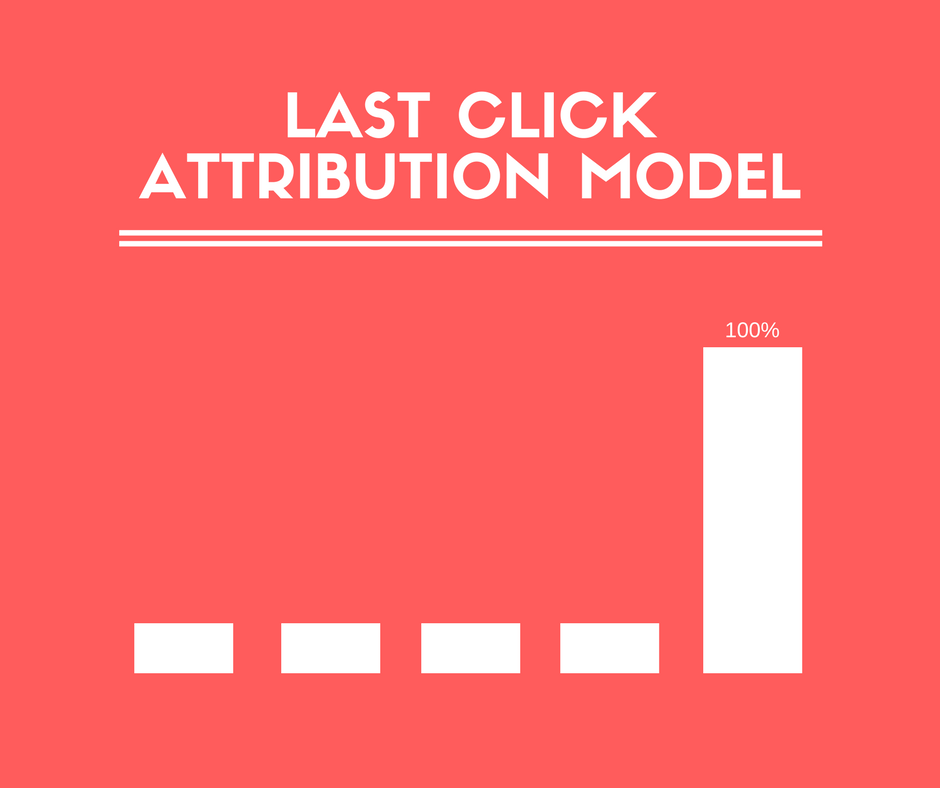

In [10]:
#Here's an image for a better understanding of last-touch attribution model

im = Image.open(requests.get('https://images.squarespace-cdn.com/content/v1/543aa7dde4b039cd17f5d910/1485361384660-XCY6T1OYOQ4N6IZDEUOG/image-asset.png?format=1500w', stream=True).raw)
im

In [11]:
def last_touch_model(dt, conv_col,channel_col):         #Defining function for last touch model
  last_touch=dt.loc[dt[conv_col]==1]          #Extracting rows where conversion is 1 
  res_last_touch=pd.DataFrame(round(last_touch[channel_col].value_counts(normalize=True)*100,2))      #Calculating the weightage
  res_last_touch.columns=['Weightage(%)']   
  return res_last_touch

In [12]:
last_touch=last_touch_model(data, 'conversion', 'channel')  #Calling the last touch model function
last_touch

Weightage(%)
channel                     
Facebook               30.05
Paid Search            25.78
Online Video           19.32
Instagram              12.72
Online Display         12.13

C:\Users\vivekhn\AppData\Local\Temp\ipykernel_14340\3172031745.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Weightage(%)', x=last_touch.index, data=last_touch, palette='pastel')


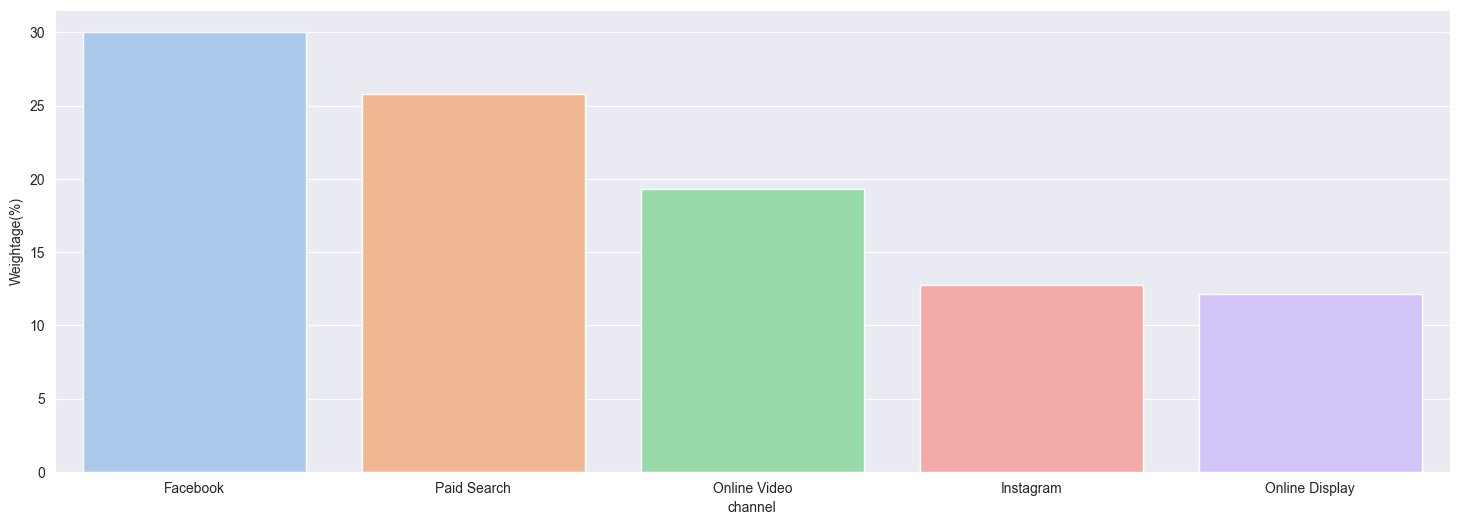

In [13]:
#Plotting the weightage with respect to channels
plt.subplots(figsize=(18, 6))
sns.barplot(y='Weightage(%)', x=last_touch.index, data=last_touch, palette='pastel')
plt.show()

##2.First-Touch Attribution Model

* With a first-touch attribution model, your first marketing interaction receives 100% of the credit.

* If one is mainly focused on widening top of your funnel, this is a useful model. It highlights the channels that first introduced a customer to your brand.

* The problem with this model is that it ignores all subsequent touches, and therefore provides no insight into your down-funnel metrics.

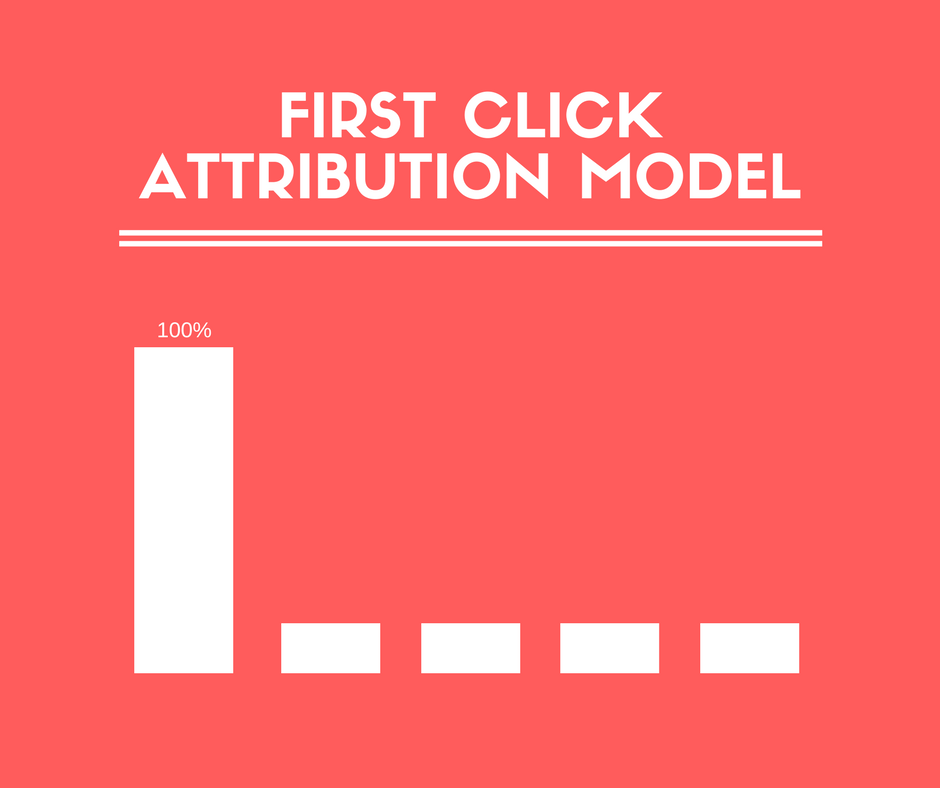

In [14]:
#Here's an image for a better understanding of first-touch attribution model 

im = Image.open(requests.get('https://images.squarespace-cdn.com/content/v1/543aa7dde4b039cd17f5d910/1485361370289-63VI7GS1BD2UUUIZHKRC/image-asset.png?format=1500w', stream=True).raw)
im


In [15]:
def first_touch_model(dt, conv_col,channel_col,user_id):
  temp=dt.loc[dt[conv_col]==1]          #Saving the dataframe where all the conversions are 1 into temp variable
  first_touch=pd.DataFrame(dt.groupby(user_id).first(),index=dt[user_id])       #Grouping with respect to cookie and then keeping only the first instance of every cookie
  cookie_index=list(temp[user_id])      #making a list of cookie column of temp
  mid_first_touch=first_touch.loc[cookie_index]     #locating cookie index in the first touch dataframe
  res_first_touch=pd.DataFrame(round(mid_first_touch[channel_col].value_counts(normalize=True)*100,2))    #Calculating weightage
  res_first_touch.columns=['Weightage(%)']
  return res_first_touch

In [16]:
first_touch = first_touch_model(data, 'conversion', 'channel', 'cookie')
first_touch

Weightage(%)
channel                     
Facebook               32.59
Online Video           25.20
Paid Search            18.47
Instagram              14.78
Online Display          8.95

C:\Users\vivekhn\AppData\Local\Temp\ipykernel_14340\63164879.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Weightage(%)', x=first_touch.index, data=first_touch, palette='pastel')


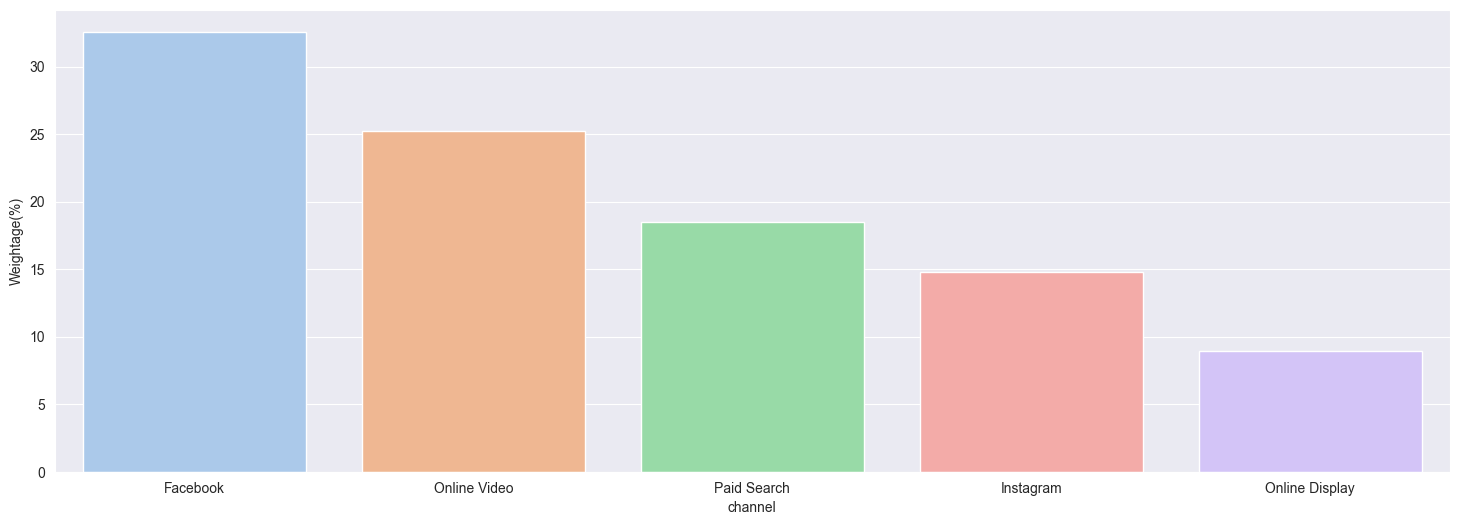

In [17]:
plt.subplots(figsize=(18, 6))
sns.barplot(y='Weightage(%)', x=first_touch.index, data=first_touch, palette='pastel')
plt.show()

##3.Last-Non-direct Touch Attribution Model
* There is one small difference between last non-direct click attribution and last-click attribution. Direct traffic is ignored, and 100% of the credit is assigned to the last channel that the visitor engaged with before making a conversion. To explain this attribution model, we’ll need to change our customer journey slightly.

* This model is best if you want to fully understand the effectiveness of your final marketing activities without direct traffic getting in the way of your analysis. However, this model still doesn’t account for any of the other campaigns or channels the customer interacted with.

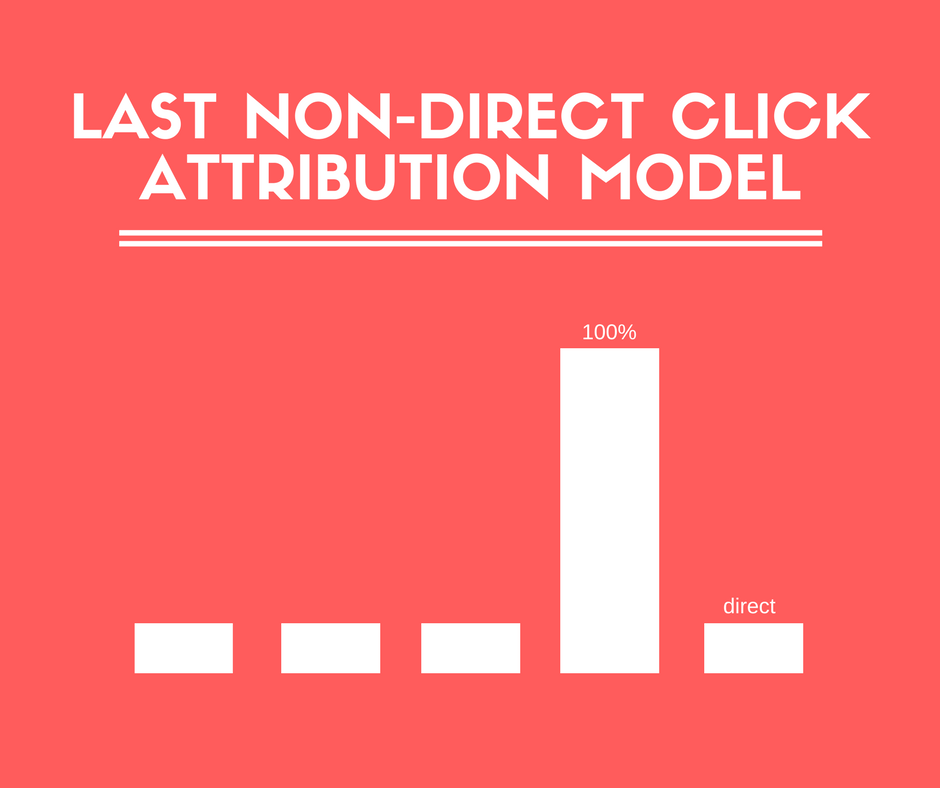

In [18]:
#Here's an image for a better understanding of last-non-direct attribution model 

im = Image.open(requests.get('https://images.squarespace-cdn.com/content/v1/543aa7dde4b039cd17f5d910/1485361396086-92JT760FV68IJMRGKMDV/image-asset.png?format=1500w', stream=True).raw)
im

In [19]:
def last_non_direct_model(dt, conv_col, channel_col, user_id):
  slp=pd.DataFrame(dt.groupby(user_id).tail(2))     #Grouping by cookie and keeping the last two observation for each cookie
  temp=slp.loc[slp[conv_col]==1]
  last_non_direct=pd.DataFrame(slp.groupby(user_id).first(),index=slp[user_id])
  cookie_index=list(temp[user_id])
  mid_last_non_direct=last_non_direct.loc[cookie_index]
  res_last_non_direct=pd.DataFrame(round(mid_last_non_direct[channel_col].value_counts(normalize=True)*100,2))
  res_last_non_direct.columns=['Weightage(%)']
  return res_last_non_direct

In [20]:
last_non_direct = last_non_direct_model(data, 'conversion', 'channel', 'cookie')
last_non_direct

Weightage(%)
channel                     
Facebook               29.97
Paid Search            24.97
Online Video           20.47
Instagram              13.22
Online Display         11.37

C:\Users\vivekhn\AppData\Local\Temp\ipykernel_14340\1044302082.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Weightage(%)', x=last_non_direct.index, data=last_non_direct, palette='pastel')


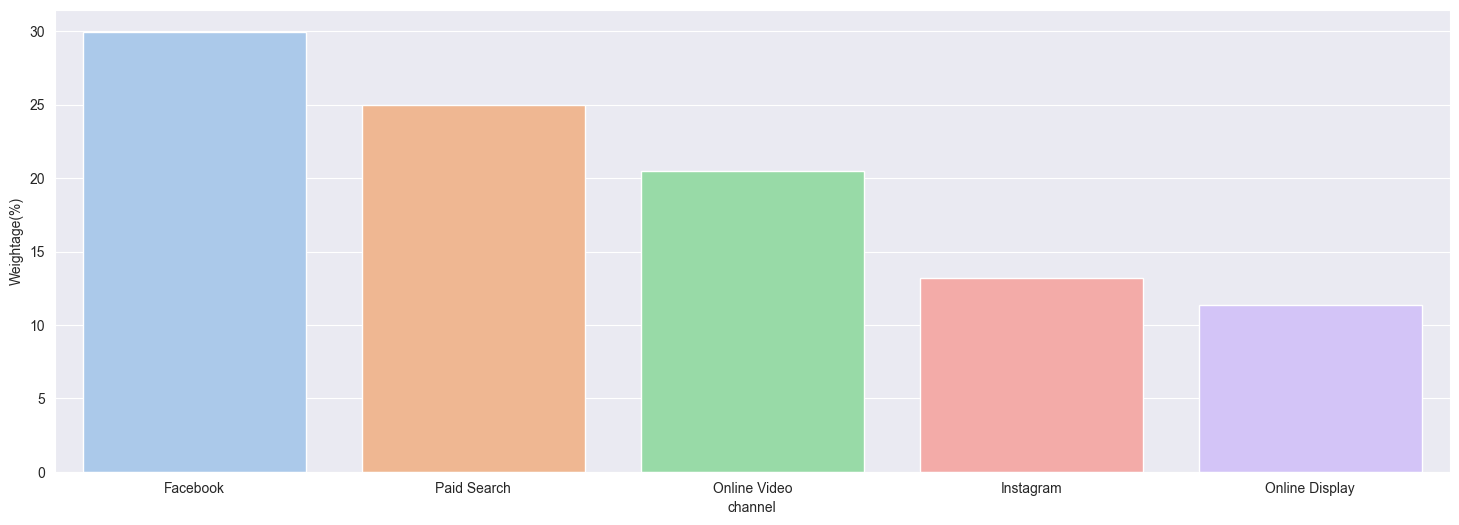

In [21]:
plt.subplots(figsize=(18, 6))
sns.barplot(y='Weightage(%)', x=last_non_direct.index, data=last_non_direct, palette='pastel')
plt.show()

#II. Multi-Touch Attribution Models

* While single-touch only gives credit to one marketing touchpoint, multi-touch assumes that all touchpoints play some role in driving a conversion. We will look at the most popular multi-touch attribution models which include Linear, Position decay and U-shaped models.

* Multi-touch attribution models have become important for marketers, especially those looking to measure the impact of digital campaigns. This is because they provide a more granular, person-level view than traditional aggregate methods such as media mix modeling.

* These models should be used when the number of channels for a particular campaign is between 5 to 10.(Preferrably Position based i.e., U-shaped Attribution Model)

##1.Linear Attribution Model

* Linear attribution gives each touchpoint across the buyer journey the same amount of credit toward driving a sale. While this type of attribution considers every touchpoint in the buyer’s journey, it values every touchpoint evenly.

* The advantage of this model is that it is easy to implement and is better than all single-touch attribution models.

* The disadvantage however is that in reality, consumers aren’t equally impacted by every kind of touchpoint/channel. 

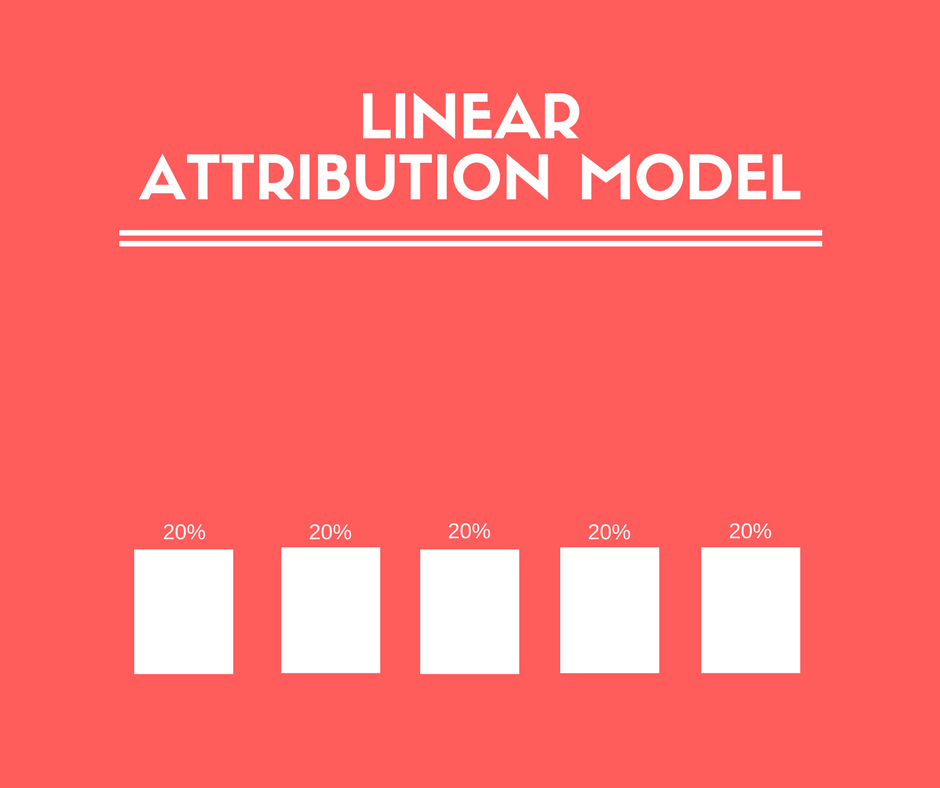

In [22]:
#Here's an image for a better understanding of Linear Attribution Model 

im = Image.open(requests.get('https://images.squarespace-cdn.com/content/v1/543aa7dde4b039cd17f5d910/1485361410008-CQ1WXEIVLJSIGKXCCLY9/image-asset.png?format=1500w', stream=True).raw)
im

In [23]:
def linear_model(dt, conv_col, channel_col, user_id):

  #Keeping data of only those users who are getting converted at the end
  pd.options.mode.chained_assignment = None 
  temp=dt.loc[dt[conv_col]==1]
  cookie_index=list(temp[user_id])
  dt['new']=dt[user_id].isin(cookie_index)      
  y=dt['new'].isin([True])
  dt_conv=dt[y]

  temp=pd.DataFrame(dt_conv.groupby(user_id).tail(1))
  x=Counter(dt_conv[user_id])
  temp['click_count']=x.values()      #Click count is total number of channels visited by an user
  temp.set_index(user_id,inplace=True)
  count=Counter(dt_conv[user_id])
  dt_conv['clicks']=dt_conv[user_id].map(count)     #Adding click count to the filtered the data
  dt_conv=dt_conv.assign(click_per=lambda x: round(100/dt_conv['clicks'],2))      #Assigning the weightages in a linear fashion

  #Getting the mean weightage of every channels    
  res_linear=dt_conv.groupby(channel_col, as_index=False)['click_per'].mean()
  sum=res_linear['click_per'].sum()
  res_linear['Weightage(%)']=res_linear.apply(lambda x: round((x['click_per']/sum)*100,2),axis=1)
  res_linear.drop(['click_per'],inplace=True,axis=1)
  res_linear=res_linear.set_index(channel_col)
  res_linear.index.name=None
  return res_linear

In [24]:
linear = linear_model(data, 'conversion', 'channel', 'cookie')    #Calling the linear model function
linear

Weightage(%)
Facebook               16.28
Instagram              16.56
Online Display         26.43
Online Video           13.11
Paid Search            27.63

C:\Users\vivekhn\AppData\Local\Temp\ipykernel_14340\3702306261.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Weightage(%)', x=linear.index, data=linear, palette='pastel')


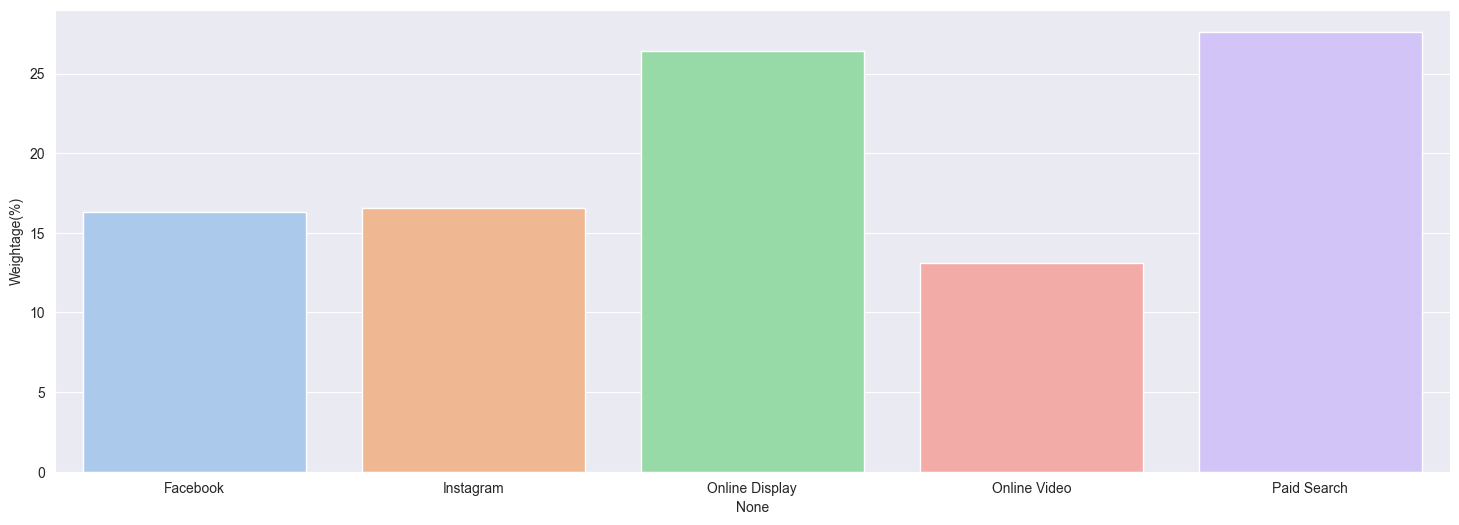

In [25]:
plt.subplots(figsize=(18, 6))
sns.barplot(y='Weightage(%)', x=linear.index, data=linear, palette='pastel')
plt.show()

##2.Position Based (U-shaped) Attribution Model

* The Position-based attribution model (also called U-shaped attribution) splits the credit for a sale between first interaction and the moment it converts.

* 40% of the credit is given to each of these points, with the remaining 20% spread out between any other interactions that happened in the middle.


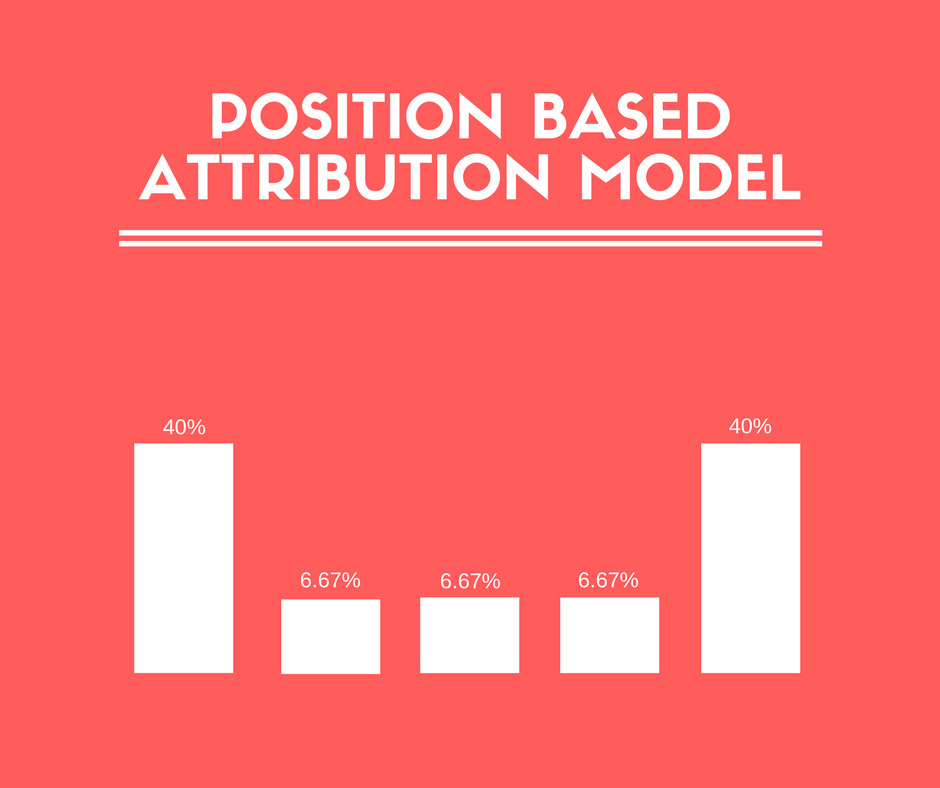

In [26]:
#Here's an image for a better understanding of Position Based (U-shaped) Attribution Model 

im = Image.open(requests.get('https://images.squarespace-cdn.com/content/v1/543aa7dde4b039cd17f5d910/1485361422019-RHMKQPN6LUJNWOJ6ZYKM/image-asset.png?format=1500w', stream=True).raw)
im

In [27]:
def calc_attribution(click_pos,total_clicks):

    #Assigning weightage according to the position of the channel
    default_att = 0.5       #if a user has visited only 2 channels 
    extreme_touch_att_1 = 0.4     #Assigining weightage to first and last channels
    intermed_att_1 = 0.2    #Total weightage for remaining channels
    
    if  total_clicks == 2:     
      return default_att
    
    elif total_clicks == 1:
      return 1
    else:
      if click_pos == total_clicks or click_pos ==1:
        return extreme_touch_att_1
      else:
        return intermed_att_1/(total_clicks-2)      #Giving equal weightage to all the mid channels from the remaining 20%

In [28]:
def u_shaped_model(dt, conv_col, channel_col, user_id):

  #Keeping data of only those users who are getting converted at the end
  pd.options.mode.chained_assignment = None     #Ignoring pandas warnings
  temp=dt.loc[dt[conv_col]==1]
  cookie_index=list(temp[user_id])
  dt['new']=dt[user_id].isin(cookie_index)
  y=dt['new'].isin([True])
  dt_conv=dt[y]

  count=Counter(dt_conv[user_id])
  dt_conv['clicks']=dt_conv[user_id].map(count)
  dt_conv['click_pos'] = dt_conv.groupby(user_id).cumcount() + 1      #Giving ranks to the channel for each user_id
  dt_Ushaped=dt_conv
  dt_Ushaped['U_Shape'] = dt_conv.apply(lambda val: round(calc_attribution(val.click_pos,val.clicks)*100,2),axis=1)

  #Getting the mean weightage of every channels
  res_Ushaped=dt_Ushaped.groupby(channel_col, as_index=False)['U_Shape'].mean()
  sum=res_Ushaped['U_Shape'].sum()
  res_Ushaped['Weightage(%)']=res_Ushaped.apply(lambda x: round((x['U_Shape']/sum)*100,2),axis=1)
  res_Ushaped.drop(['U_Shape'],inplace=True,axis=1)
  res_Ushaped=res_Ushaped.set_index(channel_col)
  res_Ushaped.index.name=None
  return res_Ushaped

In [29]:
u_shaped = u_shaped_model(data, 'conversion', 'channel', 'cookie')    #Calling u_shaped model function
u_shaped

Weightage(%)
Facebook               16.28
Instagram              16.65
Online Display         26.61
Online Video           12.99
Paid Search            27.48

C:\Users\vivekhn\AppData\Local\Temp\ipykernel_14340\4269933245.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Weightage(%)', x=u_shaped.index, data=u_shaped, palette='pastel')


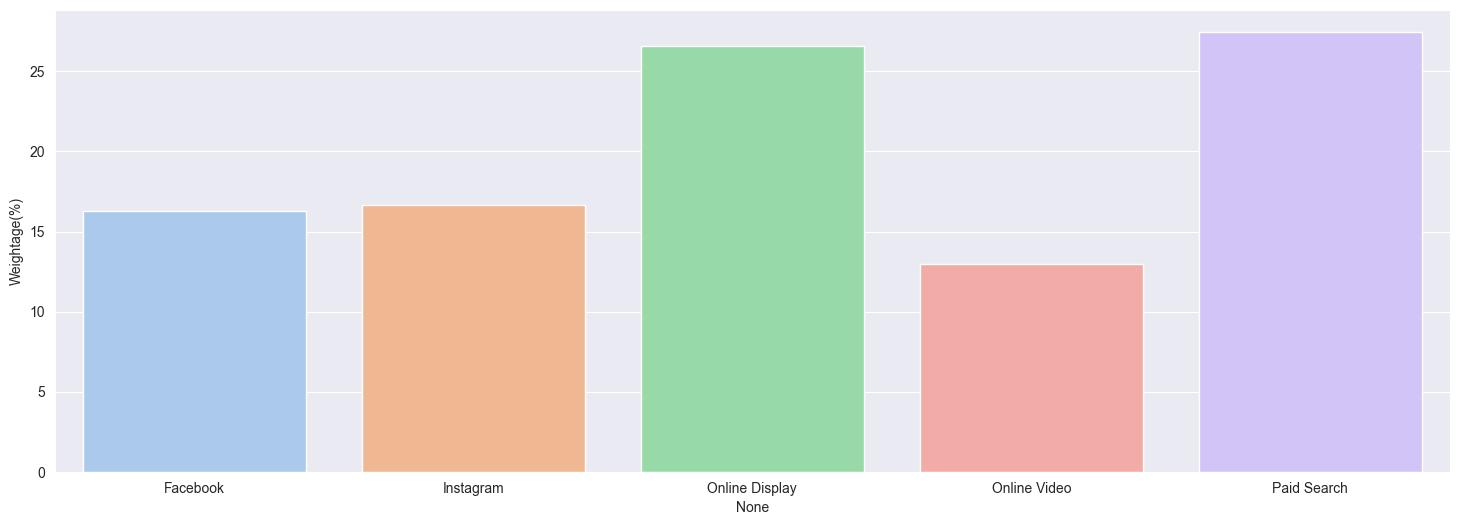

In [30]:
plt.subplots(figsize=(18, 6))
sns.barplot(y='Weightage(%)', x=u_shaped.index, data=u_shaped, palette='pastel')
plt.show()

##3.Position Decay Attribution Model

* The Position Decay is a multi-touch attribution model that uses an algorithm which allocates points to all the channels used to convert, giving them credit in reverse order. This model assumes that an user's interest in a product grows with every interaction, and the last one is the most important, as it determines the users to convert. That’s why the highest score is attributed to the last channel; then the score decreases progressively for  every channel until the first one. 

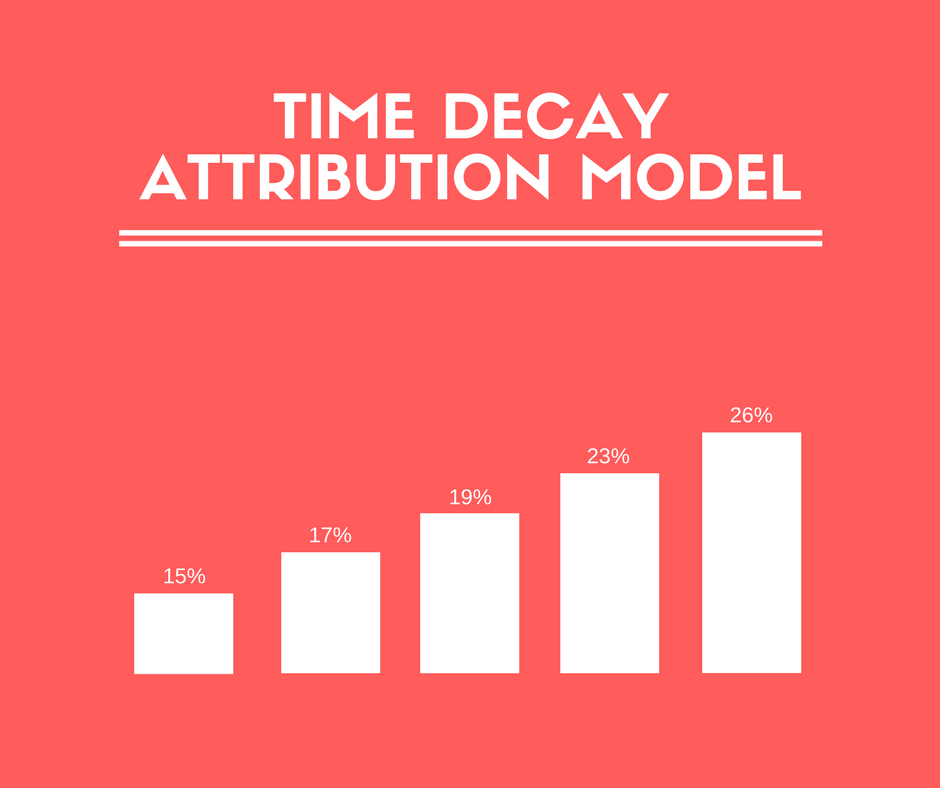

In [31]:
#Here's an image for a better understanding of Position Decay Attribution Model

im = Image.open(requests.get('https://images.squarespace-cdn.com/content/v1/543aa7dde4b039cd17f5d910/1485361433380-HEUSIZYCOGP6MAN72L5E/image-asset.png?format=1500w', stream=True).raw)
im

In [32]:
def calc_attribution(click_pos,total_clicks):
 rel_pos = total_clicks - click_pos
 attribution = pow(2, -(rel_pos))       #Assigning weightage to channels in the negative power of 2 depending on their position
 return attribution

In [33]:
def pos_decay_model(dt, conv_col, channel_col, user_id):

  #Keeping data of only those users who are getting converted at the end
  pd.options.mode.chained_assignment = None
  temp=dt.loc[dt[conv_col]==1]
  cookie_index=list(temp[user_id])
  dt['new']=dt[user_id].isin(cookie_index)
  y=dt['new'].isin([True])
  dt_conv=dt[y]

  dt_conv['temp']=1
  count=Counter(dt_conv[user_id])
  dt_conv['clicks']=dt_conv[user_id].map(count)
  dt_conv=dt_conv.assign(click_per=lambda x: round(100/dt_conv['clicks'],2))
  dt_conv['click_pos'] = dt_conv.groupby(user_id).cumcount() + 1              #Giving ranks to channels according to user_id
  dt_conv['PosDecay'] = dt_conv.apply(lambda val: calc_attribution(val.click_pos,val.clicks)*100,axis=1)
  dt_pos_decay=dt_conv

  #Getting the mean weightage of every channels
  res_pos_decay=dt_pos_decay.groupby('channel', as_index=False)['PosDecay'].mean()
  sum=res_pos_decay['PosDecay'].sum()
  res_pos_decay['Weightage(%)']=res_pos_decay.apply(lambda x: round((x['PosDecay']/sum)*100,2),axis=1)
  res_pos_decay.drop(['PosDecay'], axis=1,inplace=True)
  res_pos_decay=res_pos_decay.set_index(channel_col)
  res_pos_decay.index.name=None
  return res_pos_decay

In [34]:
pos_decay = pos_decay_model(data, 'conversion', 'channel', 'cookie')
pos_decay

Weightage(%)
Facebook               17.10
Instagram              17.14
Online Display         25.44
Online Video           14.68
Paid Search            25.64

C:\Users\vivekhn\AppData\Local\Temp\ipykernel_14340\3773284478.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Weightage(%)', x=pos_decay.index, data=pos_decay, palette='pastel')


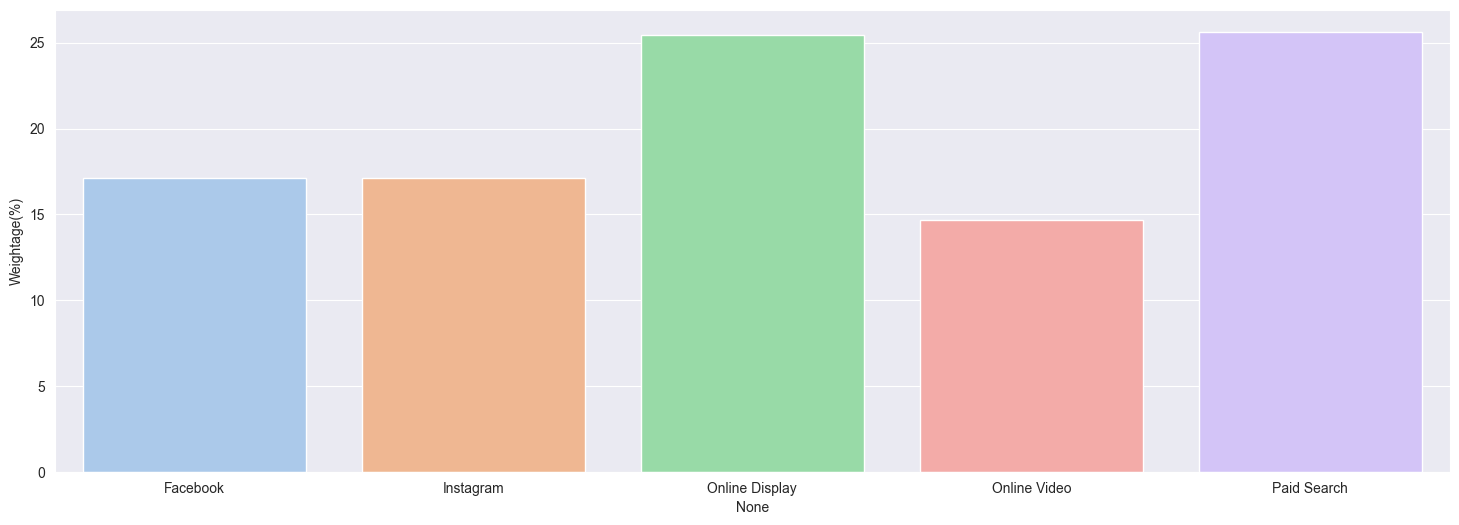

In [35]:
plt.subplots(figsize=(18, 6))
sns.barplot(y='Weightage(%)', x=pos_decay.index, data=pos_decay, palette='pastel')
plt.show()

#III. Probabilistic Attribution Models

* Probabilistic Attribution uses statistical modeling and machine learning techniques to derive probability of conversion across all marketing touchpoints which can then be used to weight the value of each touchpoint preceding the conversion.

##1.Markov Attribution Model

* Markov is a probabilistic model that represents buyer journeys as a graph, with the graph’s nodes being the touchpoints or “states”, and the graph’s connecting edges being the observed transitions between those states.

* The key ingredient to the model is the transition probabilities (the likelihood of moving between states). The number of times buyers have transitioned between two states is converted into a probability, and the complete graph can be used to measure the importance of each state and the most likely paths to success.

* Markov Attribution model should be used when the number of channels for a particular campaign is between 10 to 15.

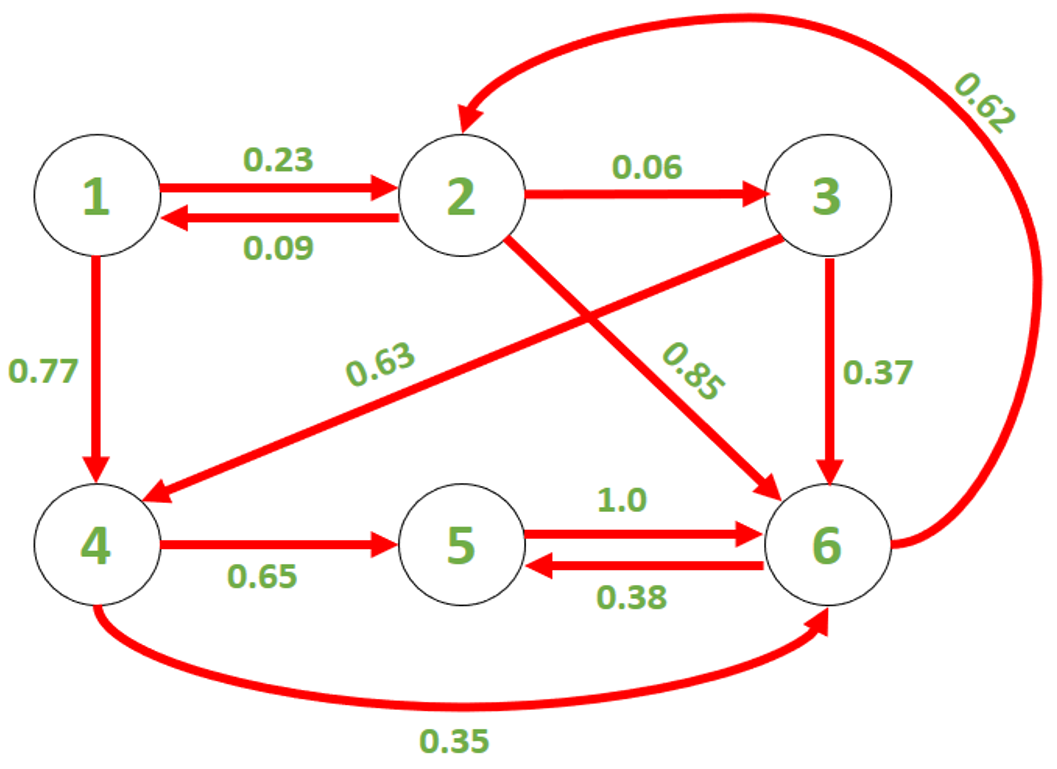

In [36]:
#Here's an image for a better understanding of Markov Attribution Model 

im = Image.open(requests.get('https://media.geeksforgeeks.org/wp-content/uploads/Markov-chain-1.png', stream=True).raw)
im

In [37]:
def transition_states(list_of_paths):
    list_of_unique_channels = set(x for element in list_of_paths for x in element)
    transition_states = {x + '>' + y: 0 for x in list_of_unique_channels for y in list_of_unique_channels}      #Creating all possible paths between any 2 channels

    #Getting the frequencies for all possible combinations
    for possible_state in list_of_unique_channels:
        if possible_state not in ['Conversion', 'Null']:
            for user_path in list_of_paths:
                if possible_state in user_path:
                    indices = [i for i, s in enumerate(user_path) if possible_state in s]       
                    for col in indices:
                        transition_states[user_path[col] + '>' + user_path[col + 1]] += 1

    return transition_states

In [38]:
def transition_prob(trans_dict,list_of_paths):

    #Assigning probabilities to each combination of paths of length 2
    list_of_unique_channels = set(x for element in list_of_paths for x in element)
    trans_prob = defaultdict(dict)
    for state in list_of_unique_channels:
        if state not in ['Conversion', 'Null']:
            counter = 0
            index = [i for i, s in enumerate(trans_dict) if state + '>' in s]
            for col in index:
                if trans_dict[list(trans_dict)[col]] > 0:
                    counter += trans_dict[list(trans_dict)[col]]
            for col in index:
                if trans_dict[list(trans_dict)[col]] > 0:
                    state_prob = float((trans_dict[list(trans_dict)[col]])) / float(counter)
                    trans_prob[list(trans_dict)[col]] = state_prob

    return trans_prob

In [39]:
def transition_matrix(list_of_paths, transition_probabilities):

    #Creating a transition matrix using the probabilities of each paths of length 2
    trans_matrix = pd.DataFrame()
    list_of_unique_channels = set(x for element in list_of_paths for x in element)

    for channel in list_of_unique_channels:
        trans_matrix[channel] = 0.00
        trans_matrix.loc[channel] = 0.00
        trans_matrix.loc[channel][channel] = 1.0 if channel in ['Conversion', 'Null'] else 0.0

    for key, value in transition_probabilities.items():
        origin, destination = key.split('>')
        trans_matrix.at[origin, destination] = value

    return trans_matrix

In [40]:
def removal_effects(dt, conversion_rate):

    #Calculating the effect of channel if it was removed
    removal_effects_dict = {}
    channels = [channel for channel in dt.columns if channel not in ['Start','Null','Conversion']]
    for channel in channels:
        removal_dt = dt.drop(channel, axis=1).drop(channel, axis=0)
        for column in removal_dt.columns:
            row_sum = np.sum(list(removal_dt.loc[column]))
            null_pct = float(1) - row_sum
            if null_pct != 0:
                removal_dt.loc[column]['Null'] = null_pct
            removal_dt.loc['Null']['Null'] = 1.0

        removal_to_conv = removal_dt[
            ['Null', 'Conversion']].drop(['Null', 'Conversion'], axis=0)
        removal_to_non_conv = removal_dt.drop(
            ['Null', 'Conversion'], axis=1).drop(['Null', 'Conversion'], axis=0)

        removal_inv_diff = np.linalg.inv(
            np.identity(
                len(removal_to_non_conv.columns)) - np.asarray(removal_to_non_conv))
        removal_dot_prod = np.dot(removal_inv_diff, np.asarray(removal_to_conv))
        removal_cvr = pd.DataFrame(removal_dot_prod,
                                   index=removal_to_conv.index)[[1]].loc['Start'].values[0]
        removal_effect = 1 - removal_cvr / conversion_rate
        removal_effects_dict[channel] = removal_effect

    return removal_effects_dict

In [41]:
def markov_chain_allocations(removal_effects, total_conversions):
    re_sum = np.sum(list(removal_effects.values()))

    return {k: (v / re_sum) * total_conversions for k, v in removal_effects.items()}


In [42]:
def markov_model(df, conv_col, channel_col, user_id):
  pd.options.mode.chained_assignment = None 
  df = df.sort_values(user_id)
  df['visit_order'] = df.groupby(user_id).cumcount() + 1
  
  df_paths = df.groupby(user_id)[channel_col].aggregate(lambda x: x.unique().tolist()).reset_index()
  df_last_interaction = df.drop_duplicates(user_id, keep='last')[[user_id, conv_col]]
  df_paths = pd.merge(df_paths, df_last_interaction, how='left', on=user_id)

  df_paths['start'] = [["Start"] for i in range(len(df_paths[conv_col]))]
  df_paths['buff'] = [["Conversion"] for i in range(len(df_paths[conv_col]))]
  df_paths['null'] = [["Null"] for i in range(len(df_paths[conv_col]))]


  df_paths['path'] = np.where(df_paths[conv_col] == 0, df_paths['start'] + df_paths[channel_col] + df_paths['null'], df_paths['start'] + df_paths[channel_col] + df_paths['buff'])
  df_paths = df_paths[[user_id, 'path']]

  list_of_paths = df_paths['path']
  total_conversions = np.sum(a.count('Conversion') for a in df_paths['path'].tolist())
  base_conversion_rate = total_conversions / len(list_of_paths)
  
  trans_states = transition_states(list_of_paths)
  trans_prob = transition_prob(trans_states, list_of_paths)
  trans_matrix = transition_matrix(list_of_paths, trans_prob)
  removal_effects_dict = removal_effects(trans_matrix, base_conversion_rate)    #Creating a dictionary of the removal effect

  attributions = markov_chain_allocations(removal_effects_dict, total_conversions)    #Allocating markov chains
  res_markov=pd.DataFrame(attributions.values(),index=attributions.keys())
  res_markov.columns=['weightage']
  sum=res_markov['weightage'].sum()
  res_markov['Weightage(%)']=res_markov.apply(lambda x: round((x['weightage']/sum)*100,2),axis=1)
  res_markov.drop(['weightage'], axis=1,inplace=True)
  res_markov=res_markov.sort_index()
  return res_markov

In [43]:
markov = markov_model(data, 'conversion', 'channel', 'cookie')
markov

C:\Users\vivekhn\AppData\Local\Temp\ipykernel_14340\3344890839.py:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  total_conversions = np.sum(a.count('Conversion') for a in df_paths['path'].tolist())
C:\Users\vivekhn\AppData\Local\Temp\ipykernel_14340\2440211722.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment

Weightage(%)
Facebook               28.55
Instagram              15.76
Online Display         12.85
Online Video           15.38
Paid Search            27.46

C:\Users\vivekhn\AppData\Local\Temp\ipykernel_14340\4122237902.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Weightage(%)', x=markov.index, data=markov, palette='pastel')


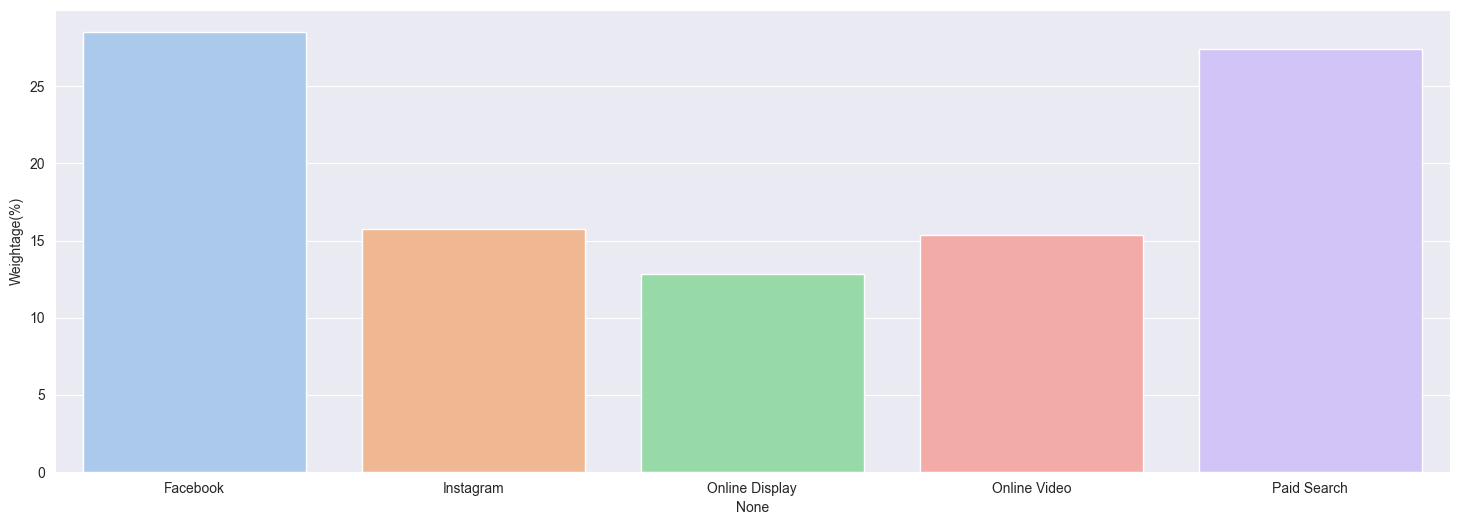

In [44]:
plt.subplots(figsize=(18, 6))
sns.barplot(y='Weightage(%)', x=markov.index, data=markov, palette='pastel')
plt.show()

##2.Shapley Value Model

* Shapley value provide a stable way to measure channel influence and fairly divide the credit for sales conversions between the channels, based on their individual contribution to the total payoff.

* As businesses strive for more accountability, efficiency, and data-driven decision making, cooperative game theory and the Shapley value provide marketing departments with an accurate and tailored solution for attribution that has the potential to deliver much more than the rules-based models are able to provide.

* Shapley Attribution model should be used when the number of channels for a particular campaign is 15 or more.

In [45]:
def power_set(List):

    #Creating a power set of a given list
    PS = [list(j) for i in range(len(List)) for j in itertools.combinations(List, i+1)]
    return PS

In [46]:
def subsets(s):
    '''
    This function returns all the possible subsets of a set of channels.
    input :
            - s: a set of channels.
    '''

    
    if len(s)==1:
        return s
    else:
        sub_channels=[]
        for i in range(1,len(s)+1):
            sub_channels.extend(map(list,itertools.combinations(s, i)))
    return list(map(",".join,map(sorted,sub_channels)))

In [47]:
def v_function(A,C_values):
    '''
    This function computes the worth of each coalition.
    inputs:
            - A : a coalition of channels.
            - C_values : A dictionnary containing the number of conversions that each subset of channels has yielded.
    '''
    subsets_of_A = subsets(A)
    #print(subsets_of_A)
    #exit()
    worth_of_A=0
    for subset in subsets_of_A:
        #print("subset:", subset)
        if subset in C_values:
            #print("subset:", subset, "; Value:", C_values[subset])
            worth_of_A += C_values[subset]
    return worth_of_A

In [48]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

In [49]:
def calculate_shapley(df, col_name):
    '''
    This function returns the shapley values
            - df: A dataframe with the two columns: ['channels_subset', 'conversion_sum'].
            - col_name: A string that is the name of the column with conversions in the dataframe
            **Make sure that that each value in channel_subset is in alphabetical order. Facebook,Paid Search and Paid Search,Facebook are the same 
            in regards to this analysis and should be combined under Facebook,Paid Search.
            ***Be careful with the distinct number of channels because this can signifcantly slow the perfomance of this function.
    '''
    
    c_values = df.set_index("channels_subset").to_dict()[col_name]
    df['channels'] = df['channels_subset'].apply(lambda x: x if len(x.split(",")) == 1 else np.nan)
    channels = list(df['channels'].dropna().unique())
    
    v_values = {}
    for A in power_set(channels):
        v_values[','.join(sorted(A))] = v_function(A,c_values)
    #print(v_values)
    n=len(channels)
    shapley_values = defaultdict(int)
    for channel in channels:
        for A in v_values.keys():
            #print(A)
            if channel not in A.split(","):
                #print(channel)
                cardinal_A=len(A.split(","))
                A_with_channel = A.split(",")
                A_with_channel.append(channel)            
                A_with_channel=",".join(sorted(A_with_channel))
                # Weight = |S|!(n-|S|-1)!/n!
                weight = (factorial(cardinal_A)*factorial(n-cardinal_A-1)/factorial(n))
                # Marginal contribution = v(S U {i})-v(S)
                contrib = (v_values[A_with_channel]-v_values[A]) 
                shapley_values[channel] += weight * contrib
        # Add the term corresponding to the empty set
        shapley_values[channel]+= v_values[channel]/n 
        
    return shapley_values

In [50]:
def shapley_model(df, conv_col, channel_col, user_id):
  dt_paths = df.sort_values(channel_col).groupby(user_id)[channel_col].aggregate(lambda x: x.unique().tolist()).reset_index()
  dt_paths['channels']=[str(x) for x in dt_paths[channel_col]]
  channel_count=Counter(dt_paths['channels'])
  channel_ct=pd.DataFrame(channel_count.items())
  channel_ct[0] =  channel_ct[0].apply(lambda x: x.replace('[','').replace(']','').replace("'","").replace(", ",","))
  channel_ct.columns=['channels_subset','conversion_sum']
  attribution=calculate_shapley(channel_ct,'conversion_sum')
  res_shapley=pd.DataFrame(attribution.values(),index=attribution.keys())
  res_shapley.columns=['weightage']
  sum=res_shapley['weightage'].sum()
  res_shapley['Weightage(%)']=res_shapley.apply(lambda x: round((x['weightage']/sum)*100,2),axis=1)
  res_shapley.drop(['weightage'], axis=1,inplace=True)
  res_shapley = res_shapley.sort_index()
  return res_shapley

In [51]:
shapley=shapley_model(data, 'conversion', 'channel', 'cookie')
shapley

Weightage(%)
Facebook               27.29
Instagram              13.11
Online Display         14.26
Online Video           14.27
Paid Search            31.06

C:\Users\vivekhn\AppData\Local\Temp\ipykernel_14340\671703391.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Weightage(%)', x=shapley.index, data=shapley, palette='pastel')


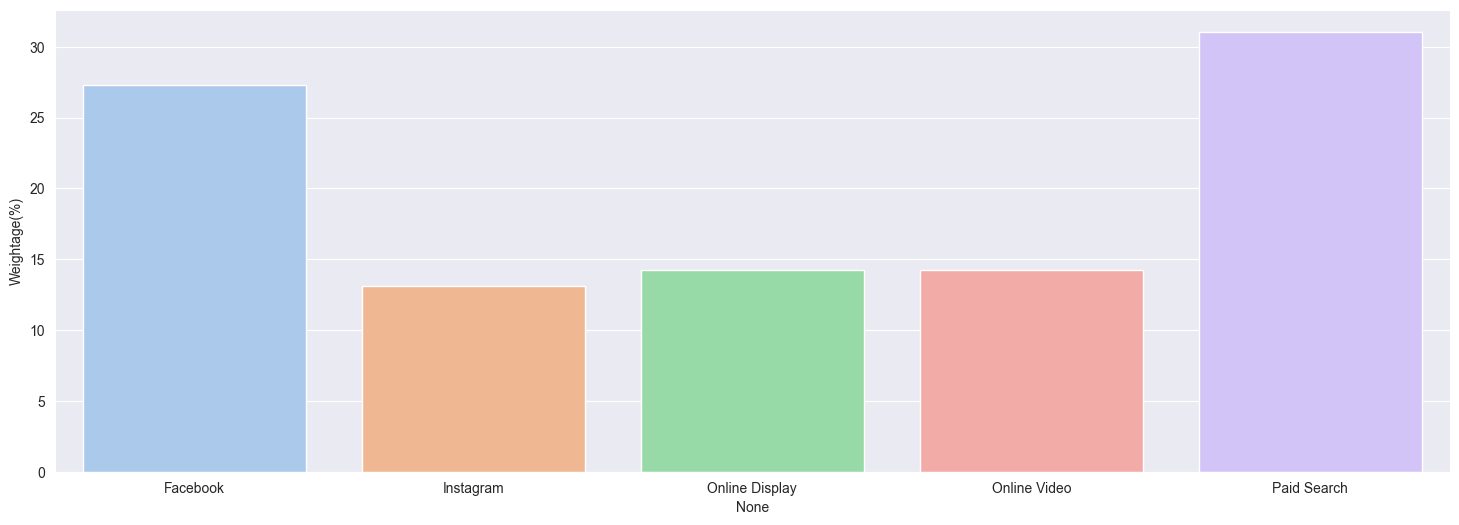

In [52]:
#visualizations
plt.subplots(figsize=(18, 6))
sns.barplot(y='Weightage(%)', x=shapley.index, data=shapley, palette='pastel')
plt.show()

#RESULTS

##Tables

In [53]:
Combined_dataframe = pd.concat([last_touch,first_touch,last_non_direct,linear,u_shaped,pos_decay,markov,shapley],axis=1)
Combined_dataframe.columns=['Last-Touch','First-Touch','Last-Non-direct','Linear','U-shaped','Position Decay','Markov','Shapley']
Combined_dataframe['Mean'] = round(Combined_dataframe.mean(axis=1),2)
Combined_dataframe

Last-Touch  First-Touch  Last-Non-direct  Linear  U-shaped  \
Facebook             30.05        32.59            29.97   16.28     16.28   
Paid Search          25.78        18.47            24.97   27.63     27.48   
Online Video         19.32        25.20            20.47   13.11     12.99   
Instagram            12.72        14.78            13.22   16.56     16.65   
Online Display       12.13         8.95            11.37   26.43     26.61   

                Position Decay  Markov  Shapley   Mean  
Facebook                 17.10   28.55    27.29  24.76  
Paid Search              25.64   27.46    31.06  26.06  
Online Video             14.68   15.38    14.27  16.93  
Instagram                17.14   15.76    13.11  14.99  
Online Display           25.44   12.85    14.26  17.26

##Graphs

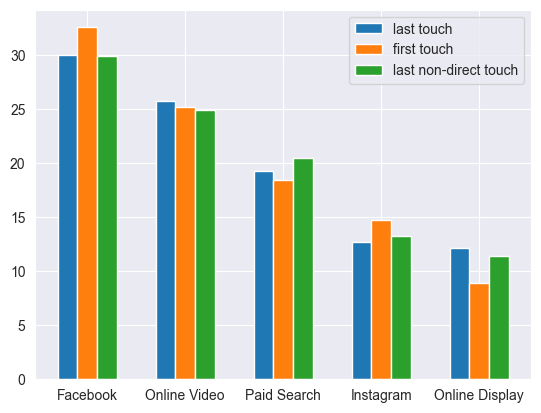

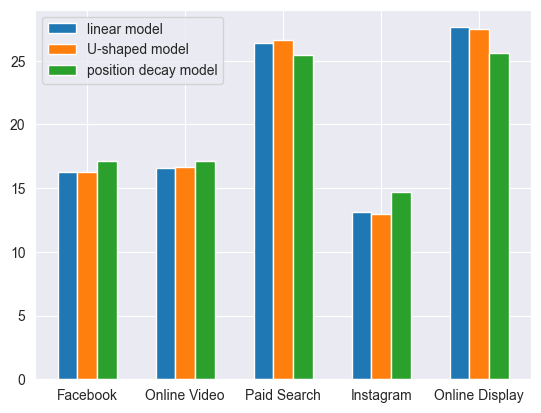

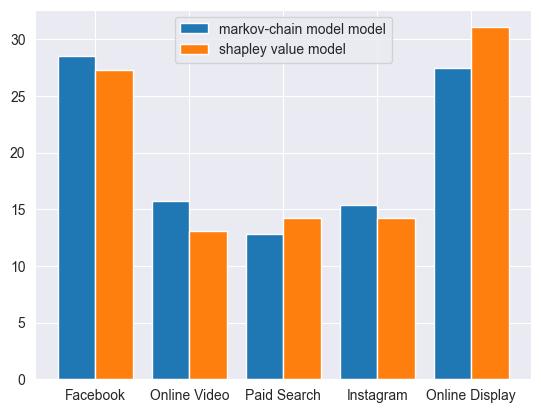

In [54]:
X_axis = np.arange(len(first_touch.index))
plt.bar(X_axis - 0.2, last_touch['Weightage(%)'],0.2,label='last touch')
plt.bar(X_axis , first_touch['Weightage(%)'],0.2,label='first touch')
plt.bar(X_axis + 0.2, last_non_direct['Weightage(%)'],0.2,label='last non-direct touch')
plt.xticks(X_axis, first_touch.index)
plt.legend()
plt.show()

print()

X_axis = np.arange(len(first_touch.index))
plt.bar(X_axis - 0.2, linear['Weightage(%)'],0.2,label='linear model')
plt.bar(X_axis , u_shaped['Weightage(%)'],0.2,label='U-shaped model')
plt.bar(X_axis + 0.2, pos_decay['Weightage(%)'],0.2,label='position decay model')
plt.xticks(X_axis, first_touch.index)
plt.legend()
plt.show()

print()

X_axis = np.arange(len(markov.index))
plt.bar(X_axis - 0.2, markov['Weightage(%)'],0.4,label='markov-chain model model')
plt.bar(X_axis + 0.2, shapley['Weightage(%)'],0.4,label='shapley value model')
plt.xticks(X_axis, first_touch.index)
plt.legend()
plt.show()

#Budget Optimization

In [55]:
# Create a GEKKO model
m = GEKKO()

# Assign values directly instead of using input()
budget = 100000  # Example budget for the campaign
print("Budget of the campaign:", budget)

# Coefficients and channel names from Combined_dataframe
coeff_A = Combined_dataframe['Mean'].tolist()
ch_names = Combined_dataframe.index.tolist()  # Extracting channel names from the index

n = len(coeff_A)

# Assigning lower bound and upper bound to each channel
x_vars = [m.Var(lb=100, ub=budget) for _ in range(n)]  # Create a list of variables

# Assigning upper bounds directly instead of taking input
upper_bounds = [25000, 10000, 50000, 50000, 20000]  # Example upper bounds for each 
# channel

for j in range(n):
    print("Channel", ch_names[j], "should not exceed:", upper_bounds[j])
    m.Equation(x_vars[j] <= upper_bounds[j])

m.Equation(sum(x_vars) <= budget)
m.Maximize(sum(coeff_A[j] * x_vars[j] for j in range(n)))

m.solve(disp=False)

# Printing the budget along with the channel names
print('\n\nBudgets:\n\n')
for j in range(n):
    print(ch_names[j] + ": " + str(round(x_vars[j].value[0], 0)))


Budget of the campaign: 100000
Channel Facebook should not exceed: 25000
Channel Paid Search should not exceed: 10000
Channel Online Video should not exceed: 50000
Channel Instagram should not exceed: 50000
Channel Online Display should not exceed: 20000


Budgets:


Facebook: 25000.0
Paid Search: 10000.0
Online Video: 44900.0
Instagram: 100.0
Online Display: 20000.0
